# 多变量线性回归







### 1.读取文件

In [3]:
import pandas as pd
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='dark', color_codes=False)  # 绘图风格设置
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [17]:
data=pd.read_csv('ex1data2.txt',engine='python',names=['size','bedrooms','price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 2.特征归一化

In [14]:
def normalize_feature(data): #标准特征归一化
    return (data - data.mean())/data.std() #mean--均值， std--方差）

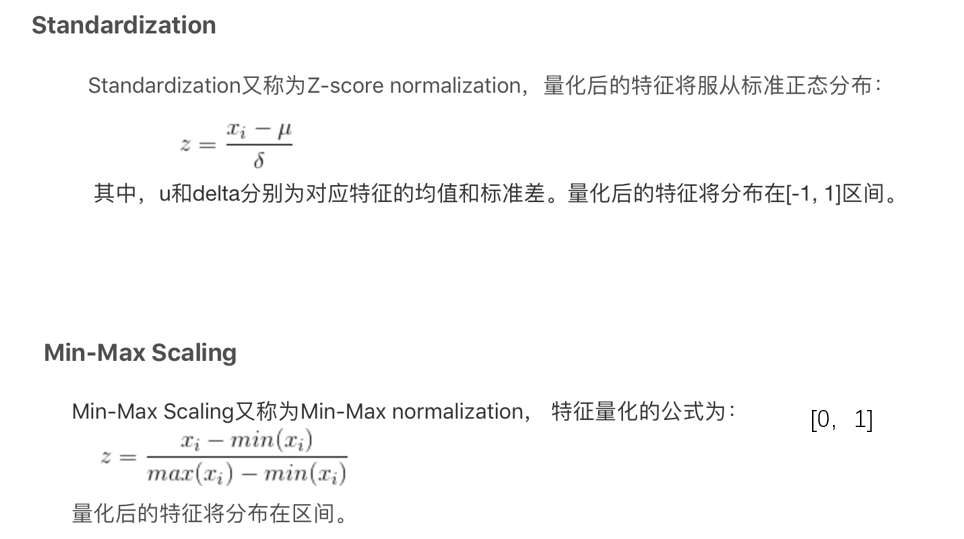

In [18]:
data = normalize_feature(data)
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


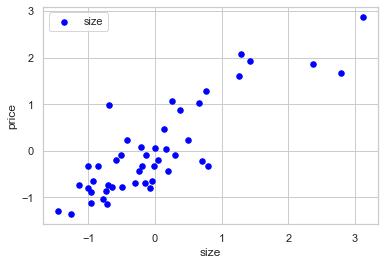

In [19]:
data.plot.scatter('size','price',c='b',label='size',s=30)
plt.show()

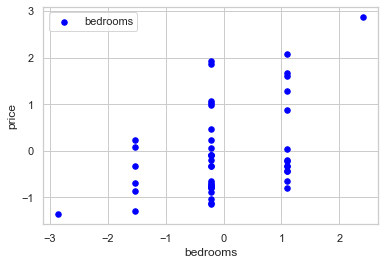

In [20]:
data.plot.scatter('bedrooms','price',c='b',label='bedrooms',s=30)
plt.show()

### 3.添加全为1的列

In [22]:
data.insert(0,'ones',1)
data.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


### 4.构建数据集X 

In [23]:
X=data.iloc[:,0:-1]
X.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [24]:
y=data.iloc[:,-1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

### 5.转为数组格式

In [25]:
X=X.values
X.shape

(47, 3)

In [26]:
y=y.values
y.shape

(47,)

In [27]:
y= y.reshape(47,1)
y.shape

(47, 1)

### 6.损失函数

In [28]:
def costFunction(X,y,theta):#代价函数,注意冒号 
    inner = np.power(X @ theta - y,2)#np.power(num,幂次)，@--矩阵相乘，计算内层 
    return np.sum(inner) / (2*len(X))#len()获取长度，对应m ，返回J（theta）


In [34]:
theta=np.zeros((3,1))

In [35]:
cost_init=costFunction(X,y,theta)#测试一下效果
print(cost_init)

0.48936170212765967


### 7.梯度下降函数

In [43]:
def gradientDescent(X,y,theta,alpha,iters,isprint=False):#梯度降落函数
    costs=[] #建立cost元组获取每次迭代时J（theta）的参数
    
    for i in range(iters):
        theta = theta - (X.T @ (X @ theta - y)) * alpha / len(X) #X.T--X的转置，
        cost = costFunction(X,y,theta) #调用costFunction函数获取每次迭代时J（theta）的值
        costs.append(cost) #append函数会在数组后加上相应的元素,costs组存cost的值
        
        if i% 100 ==0:# 每迭代100次打印一个值
            if isprint:
                print(cost)
             
    return theta,costs

### 8.不同的alpha下的效果


In [41]:
candinate_alpha=[0.0003,0.003,0.03,0.0001,0.001,0.01]
iters=2000

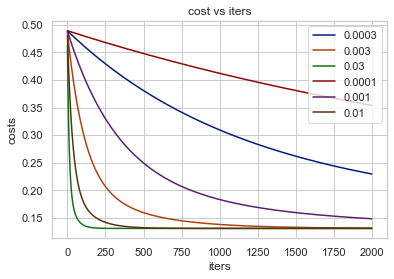

In [46]:
fig,ax = plt.subplots() #损失函数迭代可视化
   
for alpha in candinate_alpha:
    _,costs=gradientDescent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label= alpha)   #列表
    ax.legend()
ax.set(xlabel='iters',ylabel='costs',title='cost vs iters')
plt.show()